In [1]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [3]:
# Read dataset & Preprocess text
df = pd.read_csv('NLP/depression.csv')
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


<AxesSubplot:>

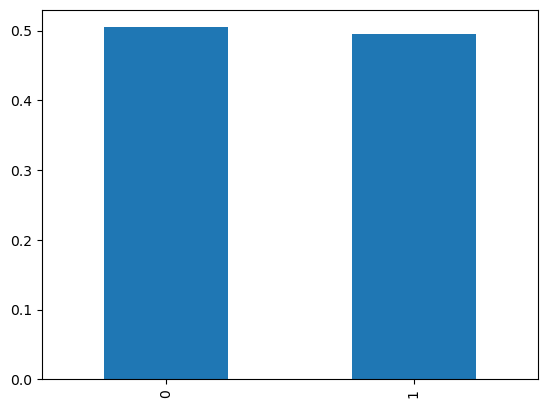

In [4]:
df["is_depression"].value_counts(normalize=True).plot(kind="bar")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
w=WordNetLemmatizer()
for i in range(len(df)):
    review=re.sub('[^a-zA-Z]', ' ', df["clean_text"][i])
    review=review.lower()
    review=review.split()
    review=[w.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    df["clean_text"][i]=review
df.head()

C:\Users\mosta\AppData\Local\Temp\ipykernel_60972\884124155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"][i]=review


,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


In [7]:
s=set()
for i in range(len(df)):
    k=df["clean_text"][i].split()
    for j in range(len(k)):
        s.add(k[j])
len(s)

18611

In [8]:
s

{'advertised',
 'jill',
 'hollowed',
 'acknowledging',
 'fitted',
 'mbantu',
 'cooperating',
 'eek',
 'rib',
 'opt',
 'rugby',
 'fluffy',
 'hair',
 'left',
 'goulandris',
 'exponentially',
 'overdue',
 'anandmahindra',
 'crumbles',
 'mortgage',
 'hollywoodheat',
 'fuckery',
 'dhdpne',
 'conceived',
 'deluded',
 'bun',
 'face',
 'established',
 'summarize',
 'charlietm',
 'foreteen',
 'moreso',
 'infrequent',
 'inventory',
 'markhardy',
 'crad',
 'prob',
 'bottomless',
 'ilpc',
 'know',
 'cloud',
 'clipper',
 'older',
 'prayer',
 'default',
 'wearablesexpert',
 'option',
 'awesome',
 'beforehand',
 'everytime',
 'stagger',
 'examz',
 'excellent',
 'reinstall',
 'discover',
 'demanded',
 'blockchain',
 'jayenge',
 'bangalore',
 'followsavvy',
 'alternate',
 'substantial',
 'hurry',
 'overestimated',
 'impossible',
 'program',
 'chewbeka',
 'medicaid',
 'eliminated',
 'lavenderetherealmusic',
 'angstst',
 'tends',
 'choclate',
 'cluster',
 'bk',
 'seizure',
 'ki',
 'dwindle',
 'erase',
 '

In [ ]:
voc_size=16511
onehot_repr1=[one_hot(words,voc_size)for words in df["clean_text"]]

In [ ]:
max=0
for i in onehot_repr1:
    if len(i)>max:
        max=len(i)
max

1844

In [ ]:
sent_length=max
embedded_docs1=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)

In [ ]:
Y=df["is_depression"]

In [ ]:
embedded_docs1.shape

(7731, 1844)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(embedded_docs1,Y,test_size=0.2,random_state=16,stratify=Y)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(6184, 1844) (6184,) (1547, 1844) (1547,)


# **1st LSTM model**

In [ ]:
embedding_vector_features=sent_length*2
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add((LSTM(1)))
model1.add(Dense(1,activation='sigmoid'))
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='mean_squared_error',optimizer=sgd,metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1844, 3688)        60892568  
                                                                 
 lstm (LSTM)                 (None, 1)                 14760     
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 60,907,330
Trainable params: 60,907,330
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
lstmm1=model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=2)

Epoch 1/5
3092/3092 [==============================] - 195s 62ms/step - loss: 0.2337 - accuracy: 0.6900 - val_loss: 0.1617 - val_accuracy: 0.8817
Epoch 2/5
3092/3092 [==============================] - 191s 62ms/step - loss: 0.1204 - accuracy: 0.8807 - val_loss: 0.0914 - val_accuracy: 0.8946
Epoch 3/5
3092/3092 [==============================] - 171s 55ms/step - loss: 0.0651 - accuracy: 0.9347 - val_loss: 0.0493 - val_accuracy: 0.9528
Epoch 4/5
3092/3092 [==============================] - 173s 56ms/step - loss: 0.0478 - accuracy: 0.9504 - val_loss: 0.0509 - val_accuracy: 0.9392
Epoch 5/5
3092/3092 [==============================] - 172s 56ms/step - loss: 0.0388 - accuracy: 0.9583 - val_loss: 0.0422 - val_accuracy: 0.9483


In [ ]:
Y_pred1=model1.predict(X_test)

49/49 [==============================] - 2s 35ms/step


In [ ]:
Y_pred1=(Y_pred1>=0.5).astype("int")
Y_pred1

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn import metrics
confusion_matrix1= metrics.confusion_matrix(Y_test,Y_pred1)
confusion_matrix1

array([[774,   6],
       [ 74, 693]])

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix1, display_labels= [False, True])

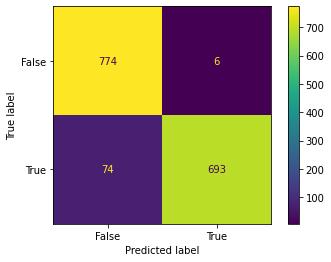

In [ ]:
cm_display.plot()
plt.show()

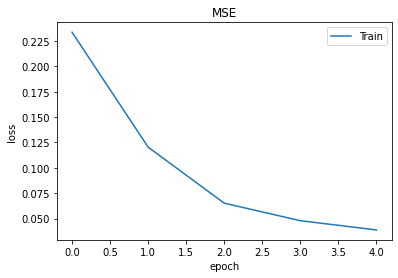

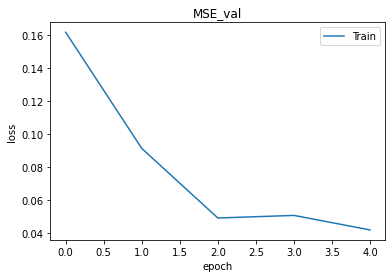

In [ ]:
plt.plot(lstmm1.history['loss'])
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#summarize history for val_loss
plt.plot(lstmm1.history['val_loss'])
plt.title('MSE_val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **2nd LSTM model**

In [ ]:
embedding_vector_features=sent_length*2
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add((LSTM(10)))
model2.add(Dense(1,activation='sigmoid'))
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='mean_squared_error',optimizer=sgd,metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1844, 3688)        60892568  
                                                                 
 lstm_1 (LSTM)               (None, 10)                147960    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61,040,539
Trainable params: 61,040,539
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
lstmm2=model2.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=5)

Epoch 1/5
1237/1237 [==============================] - 79s 63ms/step - loss: 0.2405 - accuracy: 0.6843 - val_loss: 0.2183 - val_accuracy: 0.7938
Epoch 2/5
1237/1237 [==============================] - 66s 54ms/step - loss: 0.1518 - accuracy: 0.8493 - val_loss: 0.1089 - val_accuracy: 0.8791
Epoch 3/5
1237/1237 [==============================] - 71s 58ms/step - loss: 0.1056 - accuracy: 0.8731 - val_loss: 0.0932 - val_accuracy: 0.8882
Epoch 4/5
1237/1237 [==============================] - 66s 53ms/step - loss: 0.0941 - accuracy: 0.8847 - val_loss: 0.0828 - val_accuracy: 0.9005
Epoch 5/5
1237/1237 [==============================] - 66s 53ms/step - loss: 0.0808 - accuracy: 0.8991 - val_loss: 0.0681 - val_accuracy: 0.9224


In [ ]:
Y_pred2=model2.predict(X_test)

49/49 [==============================] - 2s 41ms/step


In [ ]:
Y_pred2=(Y_pred2>=0.5).astype("int")
Y_pred2

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn import metrics
confusion_matrix2= metrics.confusion_matrix(Y_test,Y_pred2)
confusion_matrix2

array([[764,  16],
       [104, 663]])

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix2, display_labels= [False, True])

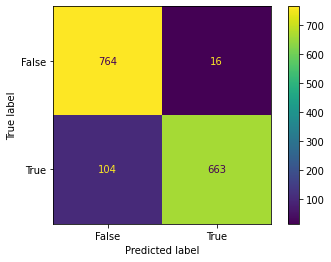

In [ ]:
cm_display.plot()
plt.show()

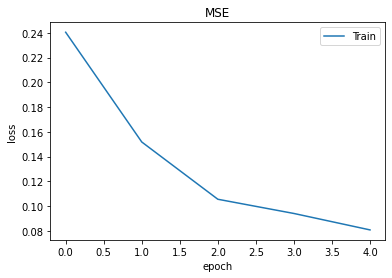

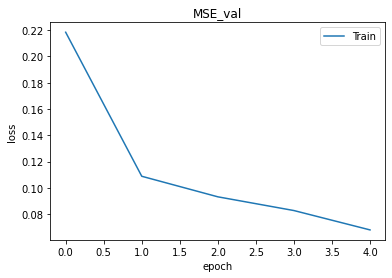

In [ ]:
plt.plot(lstmm2.history['loss'])
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#summarize history for val_loss
plt.plot(lstmm2.history['val_loss'])
plt.title('MSE_val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **3rd LSTM model**


In [ ]:
embedding_vector_features=sent_length*2
model3=Sequential()
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model3.add((LSTM(2)))
model3.add(Dense(1,activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='mean_squared_error',optimizer=sgd,metrics=['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1844, 3688)        60892568  
                                                                 
 lstm_2 (LSTM)               (None, 2)                 29528     
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 60,922,099
Trainable params: 60,922,099
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
lstmm3=model3.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=5)

Epoch 1/5
1237/1237 [==============================] - 66s 52ms/step - loss: 0.1497 - accuracy: 0.7972 - val_loss: 0.0517 - val_accuracy: 0.9438
Epoch 2/5
1237/1237 [==============================] - 67s 54ms/step - loss: 0.0480 - accuracy: 0.9466 - val_loss: 0.0392 - val_accuracy: 0.9548
Epoch 3/5
1237/1237 [==============================] - 71s 57ms/step - loss: 0.0377 - accuracy: 0.9573 - val_loss: 0.0361 - val_accuracy: 0.9580
Epoch 4/5
1237/1237 [==============================] - 63s 51ms/step - loss: 0.0325 - accuracy: 0.9607 - val_loss: 0.0361 - val_accuracy: 0.9586
Epoch 5/5
1237/1237 [==============================] - 63s 51ms/step - loss: 0.0275 - accuracy: 0.9688 - val_loss: 0.0341 - val_accuracy: 0.9580


In [ ]:
Y_pred=model3.predict(X_test)

49/49 [==============================] - 2s 39ms/step


In [ ]:
Y_pred=(Y_pred>=0.5).astype("int")
Y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       780
           1       0.96      0.95      0.96       767

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547

[[750  30]
 [ 35 732]]


In [ ]:
from sklearn import metrics
confusion_matrix3 = metrics.confusion_matrix(Y_test,Y_pred)
confusion_matrix3

array([[750,  30],
       [ 35, 732]])

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix3, display_labels= [False, True])

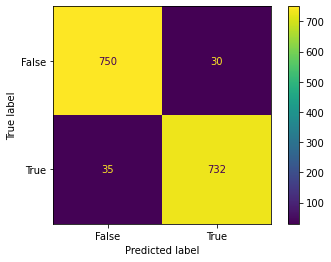

In [ ]:
cm_display.plot()

plt.show()

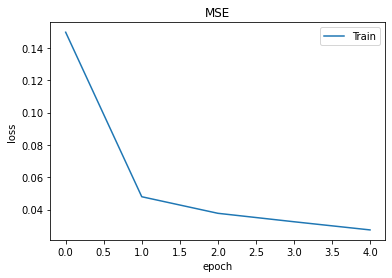

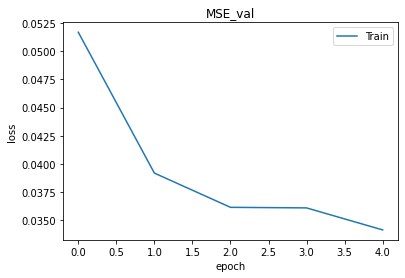

In [ ]:
plt.plot(lstmm3.history['loss'])
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#summarize history for val_loss
plt.plot(lstmm3.history['val_loss'])
plt.title('MSE_val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Multiple Models**

In [ ]:
!pip install lazypredict
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(embedded_docs1, Y, test_size=.2, random_state =123)
clf = LazyClassifier (verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
print (models)

100%|██████████| 29/29 [04:35<00:00,  9.50s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.91               0.91     0.91      0.91   
XGBClassifier                      0.90               0.90     0.90      0.90   
BaggingClassifier                  0.88               0.88     0.88      0.88   
AdaBoostClassifier                 0.87               0.87     0.87      0.87   
RandomForestClassifier             0.87               0.87     0.87      0.87   
ExtraTreesClassifier               0.86               0.86     0.86      0.86   
SVC                                0.85               0.85     0.85      0.85   
LogisticRegression                 0.85               0.85     0.85      0.85   
LinearSVC                          0.85               0.85     0.85      0.85   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
SGDClassifier               

In [ ]:
import requests
from bs4 import BeautifulSoup 

In [ ]:
site_url = "https://sentence.yourdictionary.com/depression"
final_url = site_url
final_url

'https://sentence.yourdictionary.com/depression'

In [ ]:
site_url2 = "https://sentence.yourdictionary.com/happy"
final_url2 = site_url2
final_url2

'https://sentence.yourdictionary.com/happy'

In [ ]:
# Request final url & get content
page = requests.get(final_url).text

# Init soup
soup = BeautifulSoup(page)

In [ ]:
page2 = requests.get(final_url2).text

# Init soup
soup2 = BeautifulSoup(page2)

In [ ]:
sentences = soup.find_all("p", {"class": "sentence-item__text"})

In [ ]:
sentences2 = soup2.find_all("p", {"class": "sentence-item__text"})

In [ ]:
import pandas as pd

# Initialize dataframe
sentiment_dataset = pd.DataFrame(columns=["text", "label"])

In [ ]:
sentiment_dataset

,text,label


In [ ]:
for sentence in sentences:
    sample = {"text": sentence.text, "label": 1}
    sentiment_dataset = sentiment_dataset.append(sample, ignore_index=True)

In [ ]:
print(sentiment_dataset.shape)
sentiment_dataset.head()

(500, 2)


,text,label
0,"She hadn't recognized it as depression then, t...",1
1,"Physical ills were miserable, but this depress...",1
2,It is in the south that the depression remains...,1
3,Since the ball he had felt the approach of a f...,1
4,"After these syndromes, we come to the entire s...",1


In [ ]:
# Loop over sentences & append samples
for sentence in sentences2:
    sample = {"text": sentence.text, "label": 0}
    sentiment_dataset = sentiment_dataset.append(sample, ignore_index=True)

In [ ]:
sentiment_dataset

,text,label
0,"She hadn't recognized it as depression then, t...",1
1,"Physical ills were miserable, but this depress...",1
2,It is in the south that the depression remains...,1
3,Since the ball he had felt the approach of a f...,1
4,"After these syndromes, we come to the entire s...",1
...,...,...
995,"This paradox is violent, but it is quite in ha...",0
996,"Of his poems may be mentioned The Oath, a seri...",0
997,"The marriage, only accepted by Wilhelmina unde...",0
998,They found a brilliant interpreter in Aeschine...,0


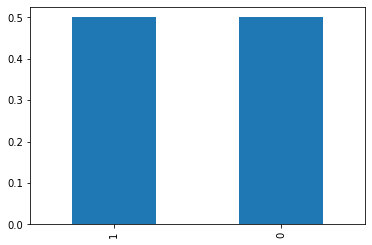

In [ ]:
sentiment_dataset["label"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
sentiment_dataset

,text,label
0,"She hadn't recognized it as depression then, t...",1
1,"Physical ills were miserable, but this depress...",1
2,It is in the south that the depression remains...,1
3,Since the ball he had felt the approach of a f...,1
4,"After these syndromes, we come to the entire s...",1
...,...,...
995,"This paradox is violent, but it is quite in ha...",0
996,"Of his poems may be mentioned The Oath, a seri...",0
997,"The marriage, only accepted by Wilhelmina unde...",0
998,They found a brilliant interpreter in Aeschine...,0
